# Question 1: Integration

In [160]:
#Imports
%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np

In [161]:
#function to be integrated
def f(x):
    return 1/(x**(3/2))

#range
a = 1
b = 5

#exact result
ans = 2-2/(math.sqrt(5))

## Rectangle Rule

In [3]:
#Rectangle function
def rect(f,a,b,N):

    #imports
    import numpy as np

    #compute delta x
    dx = (b-a)/N
    
    #generate x values
    xvals = np.linspace(a,b,N, endpoint = False)

    #multiply and sum to compute integral    
    return np.sum(f(xvals),dtype = 'float64')*dx

## Trapezoid Rule

In [4]:
#Trapezoid function
def trap(f,a,b,N):
     
    #imports
    import numpy as np

    #compute delta x
    dx = (b-a)/N
    
    #generate x values
    xvals = np.linspace(a,b,N)

    #evaluate function at x values
    yvals = f(xvals)

    #Take the averages between each pair of y values and sum to compute the integral
    return (dx/2) * np.sum( yvals[:N-1] + yvals[1:],dtype = 'float64' )

## Simpson's Rule

In [5]:
#Simpson's function
def simp(f,a,b,N):
    
    #imports
    import numpy as np

    #compute delta x
    dx = (b-a)/N
    
    #generate x values
    xvals = np.linspace(a,b,N)

    #evaluate function at x values
    yvals = f(xvals)

    #Simpson's Rule is simply 4*(every odd y value) and 2*(every even y value) in the sums
    return (dx/3) * ( 4*np.sum(yvals[1::2],dtype = 'float64') + 2*np.sum(yvals[2::2],dtype = 'float64' )  + yvals[0] + yvals[-1])

In [6]:
test = np.linspace(0,10,11)
test[1::2]

array([1., 3., 5., 7., 9.])

## Performance Comparison Function

In [7]:
#Error and performance function
def testInt(intFunc,f,a,b,Nrange,NstepSize,ans,tolerance):
    #imports
    import time

    #initialize arrays
    Nbins = np.arange(Nrange[0],Nrange[1],NstepSize)
    results = []
    times = []
    Ntolerance = 0

    #repeatedly integrate for each N value, and time each step:
    for i in Nbins.astype("int"):
        
        #start clock 
        start = time.time()
        
        #relative error
        result = abs(intFunc(f,a,b,i)-ans)/ans
        
        #stop clock
        stop = time.time()-start

        #update times array
        times.append(stop)

        #update results array
        results.append(result)

        # check tolerance
        if Ntolerance == 0 and result < tolerance:
            Ntolerance = i

    return results, times, Nbins, Ntolerance

## Results

In [8]:
#Choose test parameters
Nrange = [100,100000]
NstepSize = 100
tolerance = 10**(-3)

Rectangle Rule

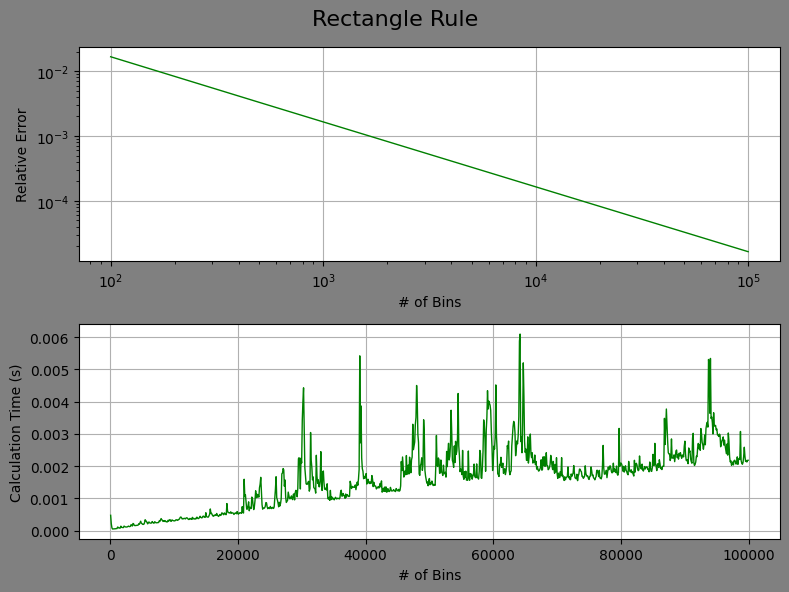

In [9]:
#make figure
fig, axs = plt.subplots(2, figsize = (8,6), facecolor = "gray")
fig.suptitle('Rectangle Rule', fontsize = 16)

#call test function
RectErrors, RectTimes, RectBins, rectTolerance = testInt(rect,f,a,b,Nrange,NstepSize,ans,tolerance)

#plot
axs[0].loglog(RectBins, RectErrors, linewidth = 1, color = "green")
axs[0].set_xlabel("# of Bins")
axs[0].set_ylabel("Relative Error")

axs[0].grid(True)

axs[1].plot(RectBins, RectTimes, linewidth = 1, color = "green")
axs[1].set_xlabel("# of Bins")
axs[1].set_ylabel("Calculation Time (s)")
axs[1].grid(True)

fig.tight_layout()


Trapezoid Rule

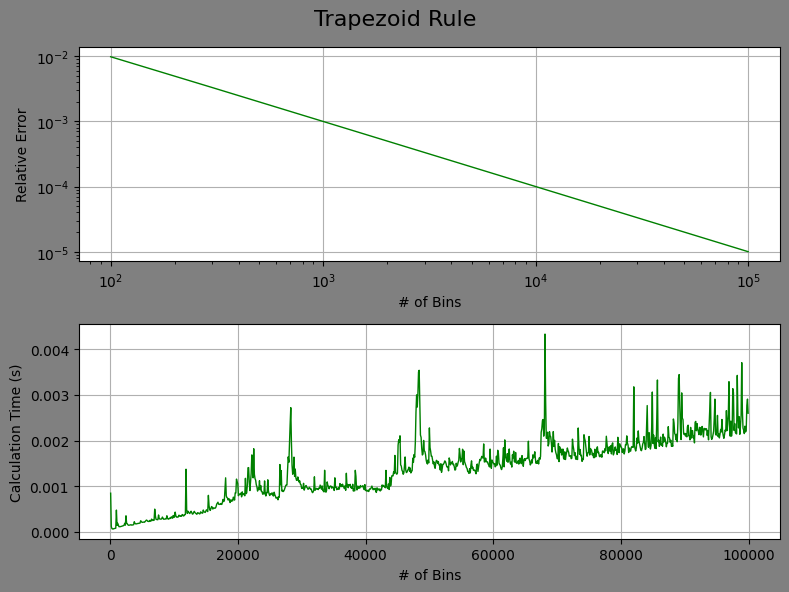

In [10]:
#make figure
fig, axs = plt.subplots(2, figsize = (8,6), facecolor = "gray")
fig.suptitle('Trapezoid Rule', fontsize = 16)


#call test function
TrapErrors, TrapTimes, TrapBins, trapTolerance = testInt(trap,f,a,b,Nrange,NstepSize,ans,tolerance)

#plot
axs[0].loglog(TrapBins, TrapErrors, linewidth = 1, color = "green")
axs[0].set_xlabel("# of Bins")
axs[0].set_ylabel("Relative Error")
axs[0].grid(True)

axs[1].plot(TrapBins, TrapTimes, linewidth = 1, color = "green")
axs[1].set_xlabel("# of Bins")
axs[1].set_ylabel("Calculation Time (s)")
axs[1].grid(True)

fig.tight_layout()

Simpson's Rule

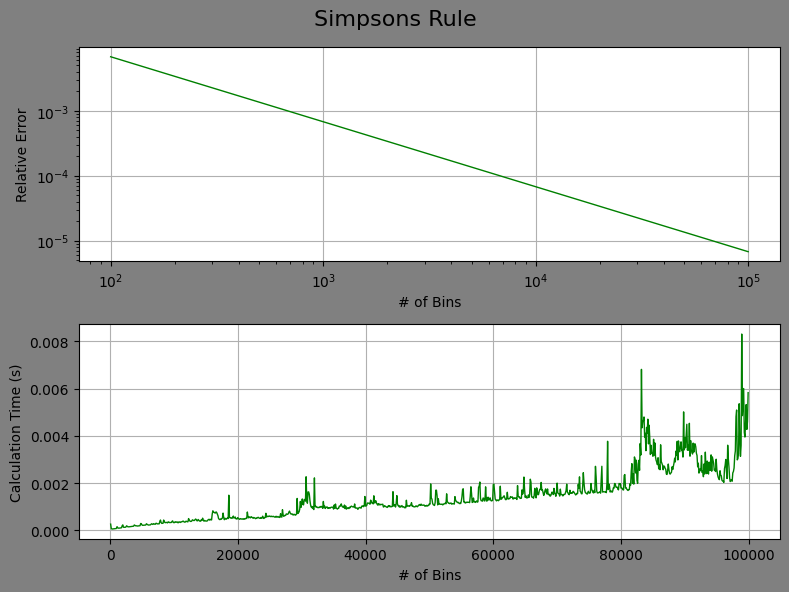

In [11]:
#make figure
fig, axs = plt.subplots(2, figsize = (8,6), facecolor = "gray")

fig.suptitle('Simpsons Rule', fontsize = 16)

#call test function
SimpErrors, SimpTimes, SimpBins, simpTolerance = testInt(simp,f,a,b,Nrange,NstepSize,ans,tolerance)

#plot
axs[0].loglog(SimpBins, SimpErrors, linewidth = 1, color = "green")
axs[0].set_xlabel("# of Bins")
axs[0].set_ylabel("Relative Error")
axs[0].grid(True)

axs[1].plot(SimpBins, SimpTimes, linewidth = 1, color = "green")
axs[1].set_xlabel("# of Bins")
axs[1].set_ylabel("Calculation Time (s)")
axs[1].grid(True)

fig.tight_layout()

In [12]:
rectTolerance

1700

In [13]:
trapTolerance

1000

In [14]:
simpTolerance

700

# Question 2

Copy-Paste of the given code:

In [136]:
#imports
%matplotlib inline
import numpy
import matplotlib 
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline as US
import scipy.integrate as s_int
import time
import math

In [137]:
# total number of particles
nptot=10**6
# total mass of halo (in M_sun)
mtot=1e12
# Hernquist scale radius (in kpc)
aa=35.0
# Newton's constant, where M is in M_sun, v is in km/s, and r is in kpc:
gn=4.30071e-6

In [138]:
# set random state 
my_randState=numpy.random.RandomState(seed=1010)

# random radii
randvs_r=my_randState.rand(nptot)
rvals=numpy.sort(1/(randvs_r**(-0.5)-1.))
rvals *= aa

# random numbers for phi, theta, v_phi, v_theta:
new_randvec=my_randState.rand(2, nptot)

#initialize 3d positions array
pos=numpy.zeros((nptot, 3), dtype='float32')

#coordinate transformation
phir=2e0*math.pi*new_randvec[0]
thetar=numpy.arccos(1e0-2e0*new_randvec[1])

#positions
pos[:,0]=rvals*numpy.sin(thetar)*numpy.cos(phir)
pos[:,1]=rvals*numpy.sin(thetar)*numpy.sin(phir)
pos[:,2]=rvals*numpy.cos(thetar)

In [139]:
#Distribution Function (without phi)
def f_hern(E,a,G,M):

    #imports
    import math
    import numpy as np

    #define intermediate variables
    q = np.sqrt(a*E/(G*M))
    v = np.sqrt((G*M)/a)

    #return function
    return M/(8*math.sqrt(2)*(math.pi*a*v)**3) * 1/((1-q**2)**(5/2)) *\
    (3*np.arcsin(q) + q*(1-q**2)**(1/2) * (1-2*q**2) * (8*q**4-8*q**2-3))

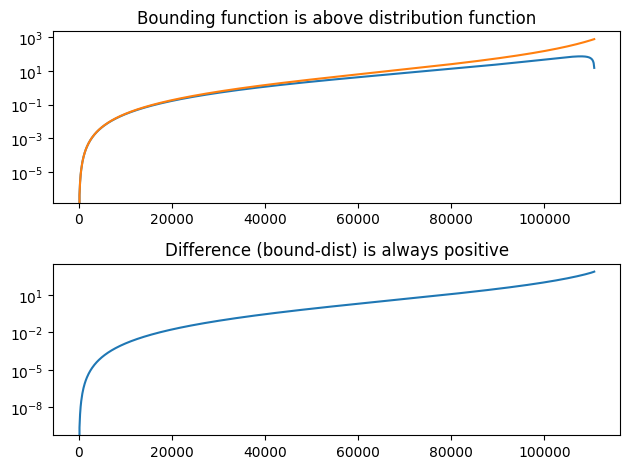

In [140]:
#import random
import random

#max energy
E_max = phi(0)-0.00000000001

#potential 
def phi(r):
    return gn*mtot/(r+aa)
    
#f(E) for our specific halo
def f_halo(E):
    return f_hern(E,aa,gn,mtot)

#F(E) for the halo
def F_halo(E):
    return s_int.quad(f_halo,0,E)[0]

#Distribution function for our specific halo
def dist(E,r):
    return np.sqrt(phi(r)-E)*f_halo(E)

#Bounding PDF
def bound(E,r):
    return np.sqrt(phi(r))*f_halo(E)

#Array of energies
E_table = np.linspace(0,E_max,1000)

#corresponding CDF values
CDF_vals = np.cumsum(f_halo(E_table))
CDF_vals /= CDF_vals[-1]

#check Bounding function validity
r_test = rvals[10000]
index_cut = np.searchsorted(E_table,phi(r_test))
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(E_table[:index_cut],dist(E_table[:index_cut],r_test))
ax1.plot(E_table[:index_cut],bound(E_table[:index_cut],r_test))
ax1.set_yscale('log')
ax1.set_title("Bounding function is above distribution function")
ax2.plot(E_table[:index_cut],bound(E_table[:index_cut],r_test)-dist(E_table[:index_cut],r_test))
ax2.set_yscale('log')
ax2.set_title("Difference (bound-dist) is always positive")

fig.tight_layout()

In [141]:
#Find energies
energies = []

t = time.time()
for r in rvals:
    
    #Rescale the F(E) to be the bounding function for this radius (sqrt(phi)*F(E))
    scaled_CDF = math.sqrt(phi(r))*CDF_vals
    
    #Create tabulated bounding CDF for this radius (ordered pairs of sqrt(phi)*F(E),E)
    CDF_table = np.stack((scaled_CDF,E_table),-1)

    #find the index of the max E for this r
    index_cut = np.searchsorted(E_table,phi(r))

    #cut the CDF and E arrays
    E_cut, scaled_CDF = E_table[:index_cut], scaled_CDF[:index_cut]
    
    #Choose a random number from 0 to the maximum F(E) stored in CDF_table
    randF = random.random()*max(scaled_CDF)
    
    #Find the index of the nearest value in the CDF_vals
    nearest_index = np.searchsorted(scaled_CDF,randF)
    nearest_index = min(nearest_index, len(E_cut) - 1)

    #choose the corresponding E
    E_value = CDF_table[nearest_index][1]

    #choose a random number between 0 and the value of the bounding function at this energy
    randf = random.random()*bound(E_value,r)

    #check if it is below the distribution function
    while randf > math.sqrt(phi(r)-E_value)*f_halo(E_value):
        
        #if it fails, generate a new energy E
        randF = random.random()*max(scaled_CDF)
        nearest_index = np.searchsorted(scaled_CDF,randF)
        E_value = CDF_table[nearest_index][1]

        #generate new number to be checked
        randf = random.random()*bound(E_value,r)
        
    #if success, add to the array
    energies += [E_value]

print(time.time()-t)

142.5582356452942


In [142]:
#make velocity 3-vectors in the same way as positions were done

#velocity vector lengths
v_lengths = np.sqrt(2*(phi(rvals)-energies))

#initialize 3d velocities array
vels=numpy.zeros((nptot, 3), dtype='float32')

#random vector
new_randvec = my_randState.rand(2, nptot)

#coordinate transformation
phir=2e0*math.pi*new_randvec[0]
thetar=numpy.arccos(1e0-2e0*new_randvec[1])

#positions
vels[:,0]=v_lengths*numpy.sin(thetar)*numpy.cos(phir)
vels[:,1]=v_lengths*numpy.sin(thetar)*numpy.sin(phir)
vels[:,2]=v_lengths*numpy.cos(thetar)

Check Dispersion

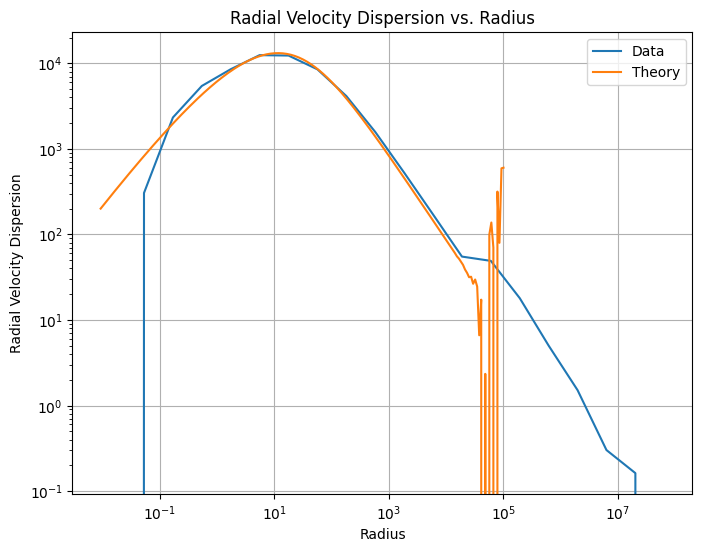

In [159]:
from scipy.stats import binned_statistic

#the theory
def vdisp(r,G,M,a):
    return G*M/(12*a) * (12*r*((r+a)**3)/(a**4)*np.log((r+a)/r) - r/(r+a) * \
    (25 + 52*r/a + 42*(r/a)**2 + 12*(r/a)**3))

#theory arrays
r_theory = np.logspace(np.log10(rvals.min()), 5, 200)
vdisp_theory = vdisp(r_theory, gn, mtot, aa)

#radial velocity components from dot product v*r
v_rads = (vels[:,0] * pos[:,0] + vels[:,1] * pos[:,1] + vels[:,2] * pos[:,2]) / rvals

#logarithmic bins
num_bins = 20  
bins = np.logspace(np.log10(rvals.min()), np.log10(rvals.max()), num_bins + 1)

#binned_statistic to calculate the stdev of each bin
sigma_rad, bin_edges, binnumber = binned_statistic(rvals, v_rads, statistic=np.std, bins=bins)

#bin centers for plotting
bin_centers = np.sqrt(bin_edges[:-1] * bin_edges[1:])

#plot
plt.figure(figsize=(8,6))
plt.loglog(bin_centers, (sigma_rad)**2, label = "Data")
plt.loglog(r_theory, vdisp_theory, label = "Theory")
plt.xlabel("Radius")
plt.ylabel("Radial Velocity Dispersion")
plt.title("Radial Velocity Dispersion vs. Radius")
plt.legend()
plt.grid(True)
plt.show()
